In [1]:
import numpy as np
import pandas as pd
import wave
import math
import matplotlib.pyplot as plt
import tensorflow as tf


import config

from data_load import load_sample_data, load_event_data, downsample, get_time_interval, plot_samples_events_individual
from data_merge import merge_samples_events, plot_merge_df
from data_transform import get_event_sequences

from data_ml import get_ml_data

In [66]:

FILE_PATHS_TRAIN = [
#     "../data/Final/FINAL_2022-04-29_Ashwin_1",
    
#     "../data/Final/FINAL_2022-04-28_Josh_1",
#     "../data/Final/FINAL_2022-04-28_Josh_2",
#     "../data/Final/FINAL_2022-04-28_Josh_3",
#     "../data/Final/FINAL_2022-04-29_Ashwin_1",
#     "../data/Final/FINAL_2022-04-29_Ashwin_2",
    
    "../data/Final/FINAL_2022-04-28_Josh_4",
    "../data/Final/FINAL_2022-04-29_Ashwin_4",
    
#     "../data/Final/FINAL_2022-04-28_Alex_1",
#     "../data/Final/FINAL_2022-04-28_Alex_2",
#     "../data/Final/FINAL_2022-04-28_Alex_3",
]

FILE_PATHS_TEST = [
#     "../data/Final/FINAL_2022-04-28_Josh_3",
    
    "../data/Final/FINAL_2022-04-29_Ashwin_5",
    
#     "../data/Final/FINAL_2022-04-28_Alex_2",
#     "../data/Final/FINAL_2022-04-28_Alex_2",
#     "../data/Final/FINAL_2022-04-28_Alex_3",
]

DOWNSAMPLE_RATE = 100

EVENT_LENGTH = 4 # length of a given event sequence in seconds

EVENT_START = -0.25
EVENT_END = 0.25


INPUT_SHAPE = (EVENT_LENGTH * DOWNSAMPLE_RATE,)
OUTPUT_SHAPE = 4  # number of categories (including None)

# TRAIN_TEST_RATIO = 0.7
# TRAIN_TEST_RATIO = 0
# TRAIN_TEST_RATIO = 1

In [67]:

train_data_all, train_labels_all = get_ml_data(
    file_paths = FILE_PATHS_TRAIN,
    event_length = EVENT_LENGTH,
    event_start = EVENT_START,
    event_end = EVENT_END,
    downsample_rate = DOWNSAMPLE_RATE,
    shuffle_data = True,
)

print(train_data_all.shape, train_data_all)
print(train_labels_all.shape, train_labels_all)


test_data, test_labels = get_ml_data(
    file_paths = FILE_PATHS_TEST,
    event_length = EVENT_LENGTH,
    event_start = EVENT_START,
    event_end = EVENT_END,
    downsample_rate = DOWNSAMPLE_RATE,
    shuffle_data = False,
)

print(test_data.shape, test_data)
print(test_labels.shape, test_labels)

Loading ML data from 2 files
Transforming data into individual sequences...
Transformed 7300 sequences of size 400
Transforming data into individual sequences...
Transformed 6000 sequences of size 400
Shuffling data sequences and labels
Combined 2 files into 13300 sequences of size 400
(13300, 400) [[ 0.1883874   0.31883355  0.18211789 ...  0.08301926  0.16603964
   0.07432285]
 [-0.06746108 -0.11221548  0.62082172 ... -0.04342655  0.0807336
  -0.01939203]
 [-0.18750456 -0.01709058 -0.14005377 ...  0.04580672 -0.1579522
   0.01415583]
 ...
 [ 1.98733086  2.1110019   1.98975777 ... -0.00273139  0.0668399
   0.00538019]
 [ 0.23753223  0.21781362  0.15734323 ...  0.26796966  0.12063629
   0.24056586]
 [-0.92697778 -1.03285151 -0.8545751  ...  1.78488652  1.67486682
   1.71733766]]
(13300,) [0 0 0 ... 0 0 0]
Loading ML data from 1 files
Transforming data into individual sequences...
Transformed 4850 sequences of size 400
Combined 1 files into 4850 sequences of size 400
(4850, 400) [[-0.078

In [68]:
train_filter = (train_labels_all != 0) | (np.random.random(len(train_labels_all)) < 0.3)

train_data = train_data_all[train_filter]
train_labels = train_labels_all[train_filter]

print(train_data.shape, train_data)
print(train_labels.shape, train_labels)

(5175, 400) [[ 0.1883874   0.31883355  0.18211789 ...  0.08301926  0.16603964
   0.07432285]
 [-1.836944   -1.71996578 -1.66787762 ... -0.36035238 -0.37217895
  -0.21119696]
 [-0.11254885  0.03346995 -0.10476253 ...  0.07128922 -0.09667284
   0.03488564]
 ...
 [-0.22946091  0.03315404 -0.04555818 ...  1.24806959  1.04024772
   1.24937893]
 [ 1.98733086  2.1110019   1.98975777 ... -0.00273139  0.0668399
   0.00538019]
 [ 0.23753223  0.21781362  0.15734323 ...  0.26796966  0.12063629
   0.24056586]]
(5175,) [0 1 2 ... 0 0 0]


In [7]:
# plot_samples_events_individual(samples_df, events_df, 1, 3)

In [10]:
# plot_samples_events_individual(samples_df, events_df, 2, 3)

None (0)	3525	68.1159%
Left (1)	800	15.4589%
Right (2)	850	16.4251%


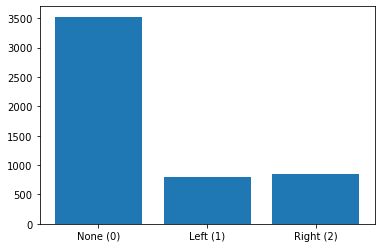

None (0)	4041	83.3196%
Left (1)	359	7.4021%
Right (2)	450	9.2784%


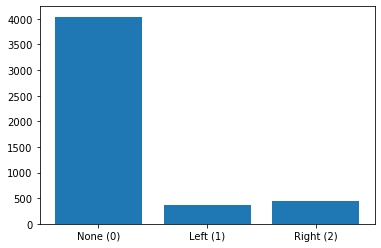

In [69]:
def labels_info(labels):
    # 0 for None, 1 for Left, 2 for Right
    bar_labels, bar_counts = np.unique(labels, return_counts=True)
    bar_labels = [f"{config.EVENT_TYPE_MAP[i]} ({i})" for i in bar_labels]

    for i,c in zip(bar_labels, bar_counts):
        print(f"{i}\t{c}\t{100*c/len(labels):.4f}%")

    plt.bar(bar_labels, bar_counts)
    plt.show()
    

labels_info(train_labels)
labels_info(test_labels)

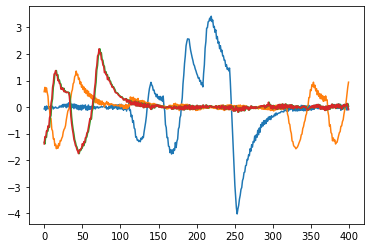

In [10]:
# plt.plot(train_labels)
# plt.show()
# plt.plot(test_labels)
# plt.show()

# plt.plot(seq_data[0])
# print(seq_labels[0])



# plt.ylim(-3, 3)
plt.plot(train_data[1000])
plt.plot(train_data[1001])
# plt.show()

# plt.ylim(-3, 3)
plt.plot(test_data[1000])
plt.plot(test_data[1001])
# plt.show()

In [70]:
# 85-86% after ~50 epochs
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dropout(.9, input_shape=INPUT_SHAPE),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 32)                12832     
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 4)                 68        
                                                                 
Total params: 13,428
Trainable params: 13,428
Non-trainable params: 0
_________________________________________________________________


In [99]:
# 1000 epochs 86-87% accuracy
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dropout(.95, input_shape=INPUT_SHAPE),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dropout_5 (Dropout)         (None, 400)               0         
                                                                 
 dense_15 (Dense)            (None, 32)                12832     
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 4)                 68        
                                                                 
Total params: 13,428
Trainable params: 13,428
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dropout(.8, input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                6416      
                                                                 
 dense_7 (Dense)             (None, 6)                 102       
                                                                 
Total params: 6,518
Trainable params: 6,518
Non-trainable params: 0
_________________________________________________________________


In [18]:
#
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dropout(.95, input_shape=INPUT_SHAPE),
    
    tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dropout_3 (Dropout)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                25664     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 6)                 198       
                                                                 
Total params: 27,942
Trainable params: 27,942
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

EPOCHS = 1000

history = model.fit(
    train_data,
    train_labels,
    epochs=EPOCHS,
    validation_data=(test_data, test_labels)
#     batch_size=16
)

Epoch 1/1000
162/162 [==============================] - 1s 2ms/step - loss: 1.7211 - accuracy: 0.5459 - val_loss: 0.8851 - val_accuracy: 0.7759
Epoch 2/1000
162/162 [==============================] - 0s 2ms/step - loss: 1.0976 - accuracy: 0.6371 - val_loss: 0.8310 - val_accuracy: 0.8214
Epoch 3/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.9611 - accuracy: 0.6591 - val_loss: 0.7757 - val_accuracy: 0.8282
Epoch 4/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.6701 - val_loss: 0.7214 - val_accuracy: 0.8330
Epoch 5/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.8517 - accuracy: 0.6686 - val_loss: 0.7046 - val_accuracy: 0.8318
Epoch 6/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.8234 - accuracy: 0.6713 - val_loss: 0.6870 - val_accuracy: 0.8332
Epoch 7/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.7858 - accuracy: 0.6862 - val_loss: 0.6714 - val_accuracy:

162/162 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7451 - val_loss: 0.5546 - val_accuracy: 0.7276
Epoch 114/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7436 - val_loss: 0.5516 - val_accuracy: 0.7309
Epoch 115/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7357 - val_loss: 0.5282 - val_accuracy: 0.7342
Epoch 116/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7328 - val_loss: 0.5710 - val_accuracy: 0.7062
Epoch 117/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7370 - val_loss: 0.5450 - val_accuracy: 0.7326
Epoch 118/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7449 - val_loss: 0.6014 - val_accuracy: 0.7146
Epoch 119/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7384 - val_loss: 0.5450 - val_accuracy: 

162/162 [==============================] - 1s 3ms/step - loss: 0.4990 - accuracy: 0.7581 - val_loss: 0.6040 - val_accuracy: 0.6986
Epoch 226/1000
162/162 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7588 - val_loss: 0.6060 - val_accuracy: 0.6961
Epoch 227/1000
162/162 [==============================] - 1s 3ms/step - loss: 0.4995 - accuracy: 0.7571 - val_loss: 0.5932 - val_accuracy: 0.6940
Epoch 228/1000
162/162 [==============================] - 1s 4ms/step - loss: 0.4846 - accuracy: 0.7623 - val_loss: 0.6060 - val_accuracy: 0.6963
Epoch 229/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7586 - val_loss: 0.5767 - val_accuracy: 0.7087
Epoch 230/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7697 - val_loss: 0.5902 - val_accuracy: 0.6977
Epoch 231/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7571 - val_loss: 0.5768 - val_accuracy: 

162/162 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7751 - val_loss: 0.6786 - val_accuracy: 0.6602
Epoch 338/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7716 - val_loss: 0.6164 - val_accuracy: 0.6864
Epoch 339/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7699 - val_loss: 0.5928 - val_accuracy: 0.6779
Epoch 340/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7735 - val_loss: 0.6208 - val_accuracy: 0.6722
Epoch 341/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7813 - val_loss: 0.6288 - val_accuracy: 0.6810
Epoch 342/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7673 - val_loss: 0.6417 - val_accuracy: 0.6806
Epoch 343/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7768 - val_loss: 0.6262 - val_accuracy: 

162/162 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7762 - val_loss: 0.6558 - val_accuracy: 0.6668
Epoch 450/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7760 - val_loss: 0.6338 - val_accuracy: 0.6926
Epoch 451/1000
162/162 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.7689 - val_loss: 0.6333 - val_accuracy: 0.6905
Epoch 452/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7772 - val_loss: 0.6854 - val_accuracy: 0.6656
Epoch 453/1000
162/162 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7716 - val_loss: 0.6390 - val_accuracy: 0.6726
Epoch 454/1000
162/162 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.7786 - val_loss: 0.6453 - val_accuracy: 0.6730
Epoch 455/1000
162/162 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7826 - val_loss: 0.6426 - val_accuracy: 

162/162 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7791 - val_loss: 0.5932 - val_accuracy: 0.7208
Epoch 562/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7834 - val_loss: 0.5957 - val_accuracy: 0.7144
Epoch 563/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7774 - val_loss: 0.6191 - val_accuracy: 0.6971
Epoch 564/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7747 - val_loss: 0.6360 - val_accuracy: 0.6930
Epoch 565/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7801 - val_loss: 0.6408 - val_accuracy: 0.6880
Epoch 566/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7845 - val_loss: 0.6352 - val_accuracy: 0.6984
Epoch 567/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.7847 - val_loss: 0.6355 - val_accuracy: 

162/162 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7784 - val_loss: 0.6094 - val_accuracy: 0.7214
Epoch 674/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7807 - val_loss: 0.6043 - val_accuracy: 0.7095
Epoch 675/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7820 - val_loss: 0.6043 - val_accuracy: 0.7064
Epoch 676/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7778 - val_loss: 0.6306 - val_accuracy: 0.6936
Epoch 677/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7797 - val_loss: 0.6209 - val_accuracy: 0.7070
Epoch 678/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7907 - val_loss: 0.6396 - val_accuracy: 0.7045
Epoch 679/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7822 - val_loss: 0.6230 - val_accuracy: 

162/162 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7776 - val_loss: 0.5958 - val_accuracy: 0.7118
Epoch 786/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7927 - val_loss: 0.6043 - val_accuracy: 0.7049
Epoch 787/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.7845 - val_loss: 0.6465 - val_accuracy: 0.6988
Epoch 788/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7786 - val_loss: 0.5980 - val_accuracy: 0.7173
Epoch 789/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7898 - val_loss: 0.6420 - val_accuracy: 0.7027
Epoch 790/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7840 - val_loss: 0.6369 - val_accuracy: 0.7070
Epoch 791/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7843 - val_loss: 0.6144 - val_accuracy: 

162/162 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7845 - val_loss: 0.5836 - val_accuracy: 0.7204
Epoch 898/1000
162/162 [==============================] - 1s 3ms/step - loss: 0.4371 - accuracy: 0.7934 - val_loss: 0.5847 - val_accuracy: 0.7033
Epoch 899/1000
162/162 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.7907 - val_loss: 0.6172 - val_accuracy: 0.7002
Epoch 900/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7818 - val_loss: 0.6154 - val_accuracy: 0.7082
Epoch 901/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7849 - val_loss: 0.6472 - val_accuracy: 0.7021
Epoch 902/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7805 - val_loss: 0.6053 - val_accuracy: 0.7206
Epoch 903/1000
162/162 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7917 - val_loss: 0.6142 - val_accuracy: 

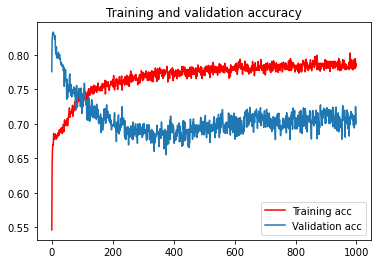

In [101]:
plt.plot(history.history['accuracy'], label='Training acc', color="red")
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
# plt.ylim(0.8)
plt.legend()

In [102]:
test_loss, test_acc = model.evaluate(
    test_data,
    test_labels,
    verbose=2
)

print('\nTest accuracy:', test_acc)

152/152 - 0s - loss: 0.6491 - accuracy: 0.7006 - 104ms/epoch - 685us/step

Test accuracy: 0.70061856508255


In [103]:
def print_confusion_matrix(data, labels):
    predictions = model.predict(data)
    predictions = tf.nn.softmax(predictions, axis=1)
    # print(predictions)

    event_pred = np.argmax(predictions, axis=1)
    # print(event_pred)

    # Rows are "real" labels
    # Columns are "predicted" labels
    conf = tf.math.confusion_matrix(
        labels,
        event_pred
    )
    print(conf)


    for i in range(len(conf)):
        total = sum(conf[i])
        correct = conf[i][i]
        print(f"Event {i} accuracy: {correct}/{total} ({100*correct/total:.2f}%)")

print_confusion_matrix(train_data, train_labels)
print_confusion_matrix(test_data, test_labels)


tf.Tensor(
[[3060  144  321]
 [ 208  592    0]
 [  30    0  820]], shape=(3, 3), dtype=int32)
Event 0 accuracy: 3060/3525 (86.81%)
Event 1 accuracy: 592/800 (74.00%)
Event 2 accuracy: 820/850 (96.47%)
tf.Tensor(
[[3018  341  682]
 [ 236  123    0]
 [ 193    0  257]], shape=(3, 3), dtype=int32)
Event 0 accuracy: 3018/4041 (74.68%)
Event 1 accuracy: 123/359 (34.26%)
Event 2 accuracy: 257/450 (57.11%)


[0.96083355 0.9607349  0.96083033 ... 0.99523664 0.9949728  0.9948225 ]
[0.02473235 0.02295108 0.02278252 ... 0.00325275 0.00349772 0.00364451]
[0.01443409 0.01631398 0.01638709 ... 0.00151054 0.00152948 0.00153302]


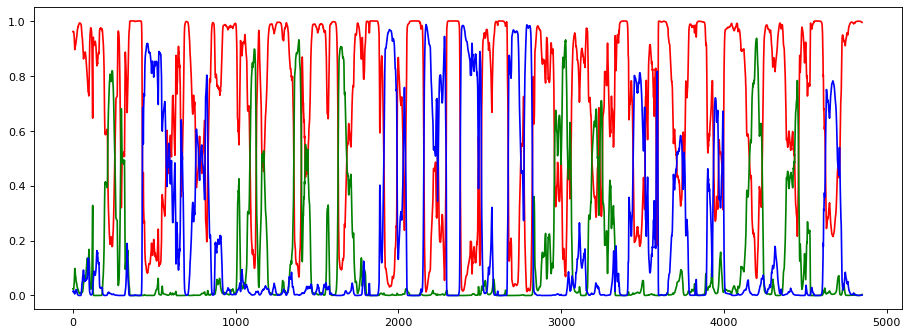

In [104]:
# Plot the predictions alongside the actual ranges
# Looks to be 100% correct at least when deciding Left VS Right
# Mostly just the borders which are wrong (so not really an issue)

# Should add additional check which uses the output of this neural network itself as a feature.
# eg. The ANN needs to output "Left" or "Right" for 90% (or 50%?) of a sequence 0.1 seconds long.

plt.figure(figsize=(14, 5), dpi=80)


predictions = model.predict(test_data)
predictions = tf.nn.softmax(predictions, axis=1)

pred_none = np.array([i[0] for i in predictions])
pred_left = np.array([i[1] for i in predictions])
pred_right = np.array([i[2] for i in predictions])

print(pred_none)
print(pred_left)
print(pred_right)

plt.plot(pred_none, color="red")
plt.plot(pred_left, color="green")
plt.plot(pred_right, color="blue")

# plt.xlim(4000)

plt.show()

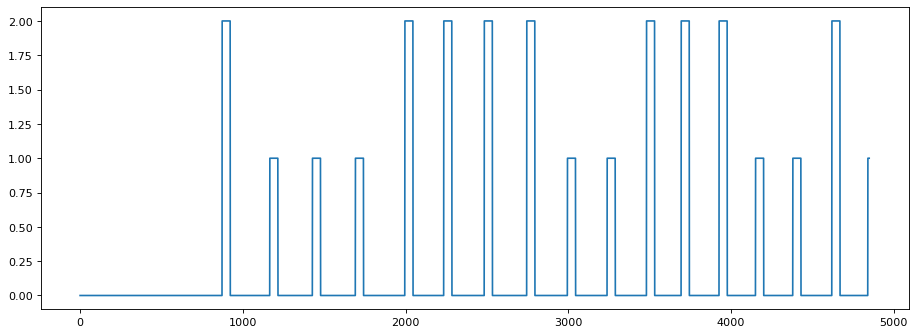

In [107]:
# True events
plt.figure(figsize=(14, 5), dpi=80)
plt.plot(test_labels)
# plt.xlim(4000)
plt.show()

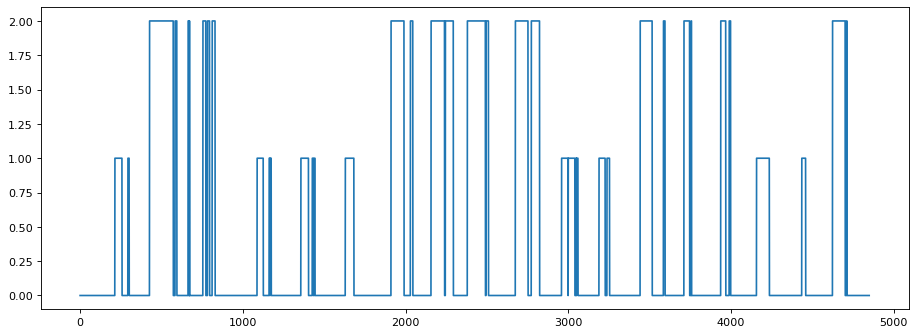

In [108]:
# Final preds
event_pred = np.argmax(predictions, axis=1)

plt.figure(figsize=(14, 5), dpi=80)
plt.plot(event_pred)
# plt.xlim(4000)
plt.show()